# Business Problem

The Data consists of data frame with 777 observations on the following 18 variables:

Private A factor with levels No and Yes indicating private or public university,
Apps- Number of applications received,
Accept -Number of applications accepted,
Enroll- Number of new students enrolled,
Top10perc -Pct. new students from top 10% of H.S. class,
Top25perc- Pct. new students from top 25% of H.S. class,
F.Undergrad -Number of fulltime undergraduates,
P.Undergrad- Number of parttime undergraduates,
Outstate- Out-of-state tuition,
Room.Board -Room and board costs,Books Estimated book costs,
Personal -Estimated personal spending,
PhD-Pct. of faculty with Ph.D.’s,
Terminal- Pct. of faculty with terminal degree,
S.F.Ratio- Student/faculty ratio,
perc.alumni- Pct. alumni who donate,
Expend- Instructional expenditure per student,
Grad.Rate -Graduation rate.

Objective:The Objective of the problem is to create a clustering model between F.Undergrad and Outstate.


# Data Understanding and EDA

In [56]:
df=pd.read_csv("College.csv")
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [57]:
df.shape

(777, 19)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [59]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

# Create x

In [60]:
x=df[["F.Undergrad","Outstate"]].values

In [61]:
x

array([[ 2885,  7440],
       [ 2683, 12280],
       [ 1036, 11250],
       ...,
       [ 2793,  6900],
       [ 5217, 19840],
       [ 2988,  4990]], dtype=int64)

# Modelling

In [62]:
from sklearn.cluster import KMeans

WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

In [63]:
#Using the elbow method to find out the optimal number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [64]:
wcss

[30815922983.323044,
 16771636290.448505,
 9512357766.121021,
 7036186249.341838,
 5123417946.473529,
 4095999788.3735046,
 3378779927.5135193,
 2868002367.2581353,
 2581098132.3020954,
 2333582830.8661375]

# Elbow Curve

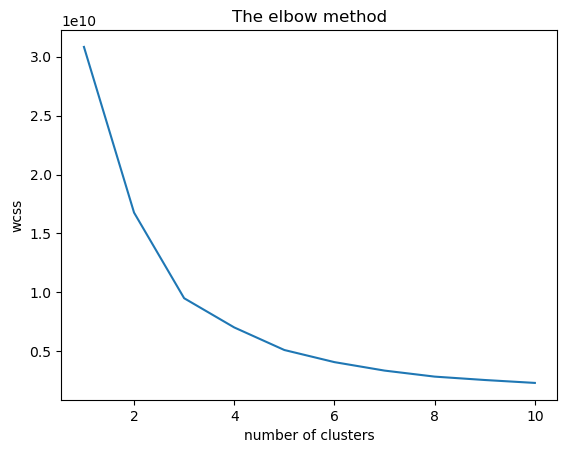

In [65]:
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

From the above figure the optimum number of clusters is 3

In [66]:
#Fitting the kmeans model on the data set
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)

# Prediction

In [67]:
ykmeans=kmeans.fit_predict(x)

# Visualising the Clusters

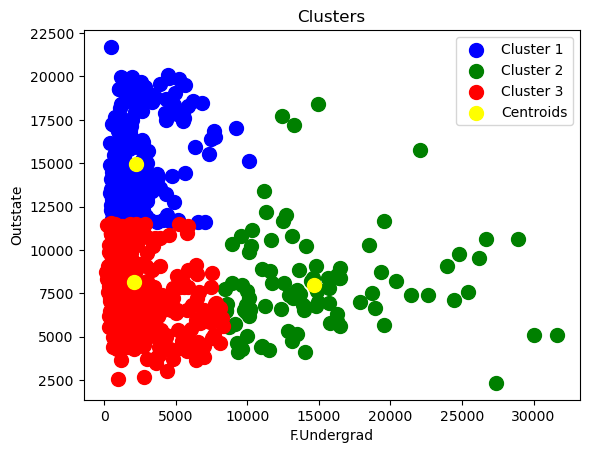

In [68]:
plt.scatter(x[ykmeans==0,0], x[ykmeans==0,1],
           s=100, c="blue", label="Cluster 1")
plt.scatter(x[ykmeans==1,0], x[ykmeans==1,1],
           s=100, c="green", label="Cluster 2")
plt.scatter(x[ykmeans==2,0], x[ykmeans==2,1],
           s=100, c="red", label="Cluster 3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=100, c="yellow", label="Centroids")

plt.title("Clusters")
plt.xlabel("F.Undergrad")
plt.ylabel("Outstate")
plt.legend()
plt.show()
           